In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats


In [2]:
# loading the data
total_movies = pd.read_csv("movies_00_19.csv")
total_movies_exp = pd.read_csv("movies_exp_00_19.csv")

movies = pd.read_csv("movies_cast_2.csv")
ratings = pd.read_csv("title_ratings_data.tsv", delimiter='\t')

In [4]:
total_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance"
2,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,NaN,47.0,Documentary
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122.0,Drama
4,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140.0,"Drama,War"


In [11]:
movies_exp = movies.assign(genres_sep = movies['genres'].str.split(',')).explode("genres_sep")
movies_exp.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Mystery
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Horror
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Mystery
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Thriller


In [5]:
movies.shape


(3540, 20)

In [12]:
total_movies_rating = pd.merge(total_movies, ratings, on='tconst')

In [13]:
total_movies_rating.shape

(133432, 11)

In [8]:
total_movies_rating.tconst.nunique()

133432

In [9]:
total_movies.shape 

(224052, 9)

In [10]:
total_movies.tconst.nunique() 

224052

In [11]:
total_movies_rating.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",6.4,84717
1,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,NaN,47.0,Documentary,6.3,89
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122.0,Drama,6.7,7364
3,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140.0,"Drama,War",7.3,35
4,tt0083060,movie,The Drive to Win,Sha Ou,0,2019.0,NaN,NaN,"Drama,Sport",6.6,33


In [12]:
movies.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028..."
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247..."
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108..."


In [13]:
total_movies_rating

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",6.4,84717
1,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,NaN,47.0,Documentary,6.3,89
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122.0,Drama,6.7,7364
3,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140.0,"Drama,War",7.3,35
4,tt0083060,movie,The Drive to Win,Sha Ou,0,2019.0,NaN,NaN,"Drama,Sport",6.6,33
...,...,...,...,...,...,...,...,...,...,...,...
133427,tt9916132,movie,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,0,2018.0,NaN,94.0,"Biography,Documentary,History",4.0,7
133428,tt9916160,movie,Drømmeland,Drømmeland,0,2019.0,NaN,72.0,Documentary,6.4,49
133429,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51.0,Drama,7.0,7
133430,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019.0,NaN,NaN,"Adventure,History,War",3.8,14


In [14]:
ratings.shape, total_movies.shape

((1260951, 3), (224052, 9))

In [15]:
len(set(ratings.tconst) & set(total_movies.tconst))

133432

In [16]:
len(set(ratings.tconst) & set(movies.tconst))

3540

In [17]:
set(total_movies.tconst) - set(ratings.tconst)

{'tt6438876',
 'tt5761898',
 'tt2112104',
 'tt21651126',
 'tt6721552',
 'tt6538514',
 'tt5122236',
 'tt1948188',
 'tt5207934',
 'tt3989602',
 'tt14104712',
 'tt10691678',
 'tt12988748',
 'tt1841650',
 'tt5153538',
 'tt3477294',
 'tt4391564',
 'tt6914040',
 'tt2294737',
 'tt6986902',
 'tt5330852',
 'tt11455262',
 'tt3667198',
 'tt4007298',
 'tt4063788',
 'tt4203222',
 'tt6987612',
 'tt8326312',
 'tt1720883',
 'tt9099702',
 'tt21244560',
 'tt3188088',
 'tt2288063',
 'tt6513126',
 'tt1942895',
 'tt3532448',
 'tt4183046',
 'tt6831308',
 'tt4060580',
 'tt0491763',
 'tt2581014',
 'tt12888180',
 'tt2188653',
 'tt11693328',
 'tt1521754',
 'tt11000348',
 'tt6273698',
 'tt10168242',
 'tt10790016',
 'tt9564712',
 'tt4587622',
 'tt2268593',
 'tt10356274',
 'tt8619444',
 'tt15041972',
 'tt0481599',
 'tt2149678',
 'tt0456959',
 'tt5358626',
 'tt4894300',
 'tt5992308',
 'tt1537309',
 'tt3409842',
 'tt10463006',
 'tt1773796',
 'tt1765855',
 'tt6053846',
 'tt8447926',
 'tt1980143',
 'tt1034015',
 'tt29

In [18]:
movies_exp.groupby("genres_sep")["tconst"].nunique()

genres_sep
Action          993
Adventure       625
Biography       294
Comedy         1252
Crime           705
Documentary      25
Drama          1884
Family          207
Fantasy         310
History         124
Horror          443
Music           114
Musical          30
Mystery         397
News              2
Romance         626
Sci-Fi          302
Sport            84
Thriller        641
War              44
Western          22
Name: tconst, dtype: int64

In [19]:
len(total_movies_exp.groupby("genres_sep")["tconst"].nunique())

27

In [20]:
total_movies_exp

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_sep
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",Action
1,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",Crime
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Comedy
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Fantasy
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Romance
...,...,...,...,...,...,...,...,...,...,...
353691,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,NaN,123.0,Drama,Drama
353692,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,NaN,57.0,Documentary,Documentary
353693,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,NaN,100.0,Documentary,Documentary
353694,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013.0,NaN,NaN,Comedy,Comedy


In [21]:
set(total_movies_exp.genres_sep) - set(movies_exp.genres_sep)

{'Adult', 'Animation', 'Game-Show', 'Reality-TV', 'Short', 'Talk-Show'}

In [22]:
set(total_movies_exp.genres_sep)  & set(movies_exp.genres_sep)

{'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [23]:
total_movies_exp.groupby("genres_sep")["tconst"].nunique()

genres_sep
Action         17348
Adult           1277
Adventure       9056
Animation       4278
Biography       9915
Comedy         41678
Crime          11645
Documentary    74965
Drama          82766
Family          8141
Fantasy         5665
Game-Show         10
History         7476
Horror         15502
Music           6741
Musical         2397
Mystery         7173
News            1300
Reality-TV       284
Romance        17110
Sci-Fi          4667
Short             34
Sport           3864
Talk-Show         82
Thriller       17275
War             2366
Western          681
Name: tconst, dtype: int64

In [24]:
total_movies_exp

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_sep
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",Action
1,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",Crime
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Comedy
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Fantasy
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Romance
...,...,...,...,...,...,...,...,...,...,...
353691,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,NaN,123.0,Drama,Drama
353692,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,NaN,57.0,Documentary,Documentary
353693,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,NaN,100.0,Documentary,Documentary
353694,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013.0,NaN,NaN,Comedy,Comedy


In [25]:
movies_exp

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Mystery
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Horror
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Mystery
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",...,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN,"['nm0000483', 'nm0289098', 'nm0716490', 'nm053...",Action
3538,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",...,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN,"['nm0000483', 'nm0289098', 'nm0716490', 'nm053...",Drama
3539,2493,tt1270296,movie,The Killing Jar,The Killing Jar,0,2010,NaN,92,"Crime,Mystery,Thriller",...,en,400000,2339,200000.000000,0.000005,5.7,2751,NaN,"['nm0000514', 'nm0674782', 'nm0072435', 'nm000...",Crime
3539,2493,tt1270296,movie,The Killing Jar,The Killing Jar,0,2010,NaN,92,"Crime,Mystery,Thriller",...,en,400000,2339,200000.000000,0.000005,5.7,2751,NaN,"['nm0000514', 'nm0674782', 'nm0072435', 'nm000...",Mystery


In [26]:
total_movies_exp_df = total_movies_exp.genres_sep.value_counts().to_frame()
total_movies_exp_df

,genres_sep
Drama,82766
Documentary,74965
Comedy,41678
Action,17348
Thriller,17275
Romance,17110
Horror,15502
Crime,11645
Biography,9915
Adventure,9056


In [27]:
movies_exp_df = movies_exp.genres_sep.value_counts().to_frame()
movies_exp_df 


,genres_sep
Drama,1884
Comedy,1252
Action,993
Crime,705
Thriller,641
Romance,626
Adventure,625
Horror,443
Mystery,397
Fantasy,310


In [28]:
for i in [set(total_movies_exp.genres_sep) - set(movies_exp.genres_sep)]:
    

    df1 = pd.DataFrame({
        "genres_sep": 0,

    }, index=i)
    movies_exp_df = movies_exp_df.append(df1)

movies_exp_df

,genres_sep
Drama,1884
Comedy,1252
Action,993
Crime,705
Thriller,641
Romance,626
Adventure,625
Horror,443
Mystery,397
Fantasy,310


In [29]:
# df = pd.concat([movies_exp_df, total_movies_exp_df], axis=1)

# # Observed counts
# obs = df.values

# # Perform the chi-squared test
# chi2, p, dof, ex = chi2_contingency(obs)

In [30]:
# df

In [31]:
movies_exp_df


,genres_sep
Drama,1884
Comedy,1252
Action,993
Crime,705
Thriller,641
Romance,626
Adventure,625
Horror,443
Mystery,397
Fantasy,310


In [32]:
total_movies_exp_df

,genres_sep
Drama,82766
Documentary,74965
Comedy,41678
Action,17348
Thriller,17275
Romance,17110
Horror,15502
Crime,11645
Biography,9915
Adventure,9056


In [33]:
# chi2, p_value = stats.chisquare(list(total_movies_exp_df.genres_sep),list(movies_exp_df.genres_sep))
# print(f'Chi-squared statistic for genres: {chi2}')
# print(f'p-value for genres: {p_value}')

Both chi-square tests and t tests can test for differences between two groups. However, a t test is used when you have a dependent quantitative variable and an independent categorical variable (with two groups). A chi-square test of independence is used when you have two categorical variables:  https://www.scribbr.com/frequently-asked-questions/difference-between-chi-square-and-t-test/



In [34]:
from scipy import stats

In [35]:
movies_exp_df =  movies_exp_df.reset_index()
total_movies_exp_df = total_movies_exp_df.reset_index()




In [36]:
total_movies_exp_df

,index,genres_sep
0,Drama,82766
1,Documentary,74965
2,Comedy,41678
3,Action,17348
4,Thriller,17275
5,Romance,17110
6,Horror,15502
7,Crime,11645
8,Biography,9915
9,Adventure,9056


In [37]:
dropped_total_movies = total_movies_exp_df.drop(total_movies_exp_df[(total_movies_exp_df['index'] == "Documentary")].index)
dropped_movies = movies_exp_df.drop(movies_exp_df[(movies_exp_df['index'] == "Documentary")].index)
print(stats.ttest_ind(dropped_movies.genres_sep, dropped_total_movies.genres_sep))
for i in list(set(total_movies_exp.genres_sep) - set(movies_exp.genres_sep)):
    print(i)
    dropped_total_movies = dropped_total_movies.drop(dropped_total_movies[(dropped_total_movies['index'] == i)].index)
    dropped_movies = dropped_movies.drop(dropped_movies[(dropped_movies['index'] == i)].index)
    



Ttest_indResult(statistic=-3.0789082995641626, pvalue=0.0033699999275108613)
Reality-TV
Adult
Talk-Show
Animation
Game-Show
Short


In [38]:
stats.ttest_ind(total_movies_exp_df.genres_sep, movies_exp_df.genres_sep)

Ttest_indResult(statistic=3.1740181620802126, pvalue=0.0025257293745523227)

In [39]:
stats.ttest_ind(dropped_movies.genres_sep, dropped_total_movies.genres_sep)

Ttest_indResult(statistic=-3.1582477257610786, pvalue=0.0031067521419617197)

In [40]:
set(dropped_movies.index) - set(dropped_total_movies.index)

{1, 16}

In [41]:
dropped_total_movies = dropped_total_movies.drop(dropped_total_movies[(dropped_total_movies['index'] == "Short")].index)
dropped_total_movies



,index,genres_sep
0,Drama,82766
2,Comedy,41678
3,Action,17348
4,Thriller,17275
5,Romance,17110
6,Horror,15502
7,Crime,11645
8,Biography,9915
9,Adventure,9056
10,Family,8141


In [42]:
dropped_movies

,index,genres_sep
0,Drama,1884
1,Comedy,1252
2,Action,993
3,Crime,705
4,Thriller,641
5,Romance,626
6,Adventure,625
7,Horror,443
8,Mystery,397
9,Fantasy,310


In [43]:
stats.ttest_ind(total_movies_rating.averageRating, movies.averageRating)

Ttest_indResult(statistic=-0.8410202643828064, pvalue=0.40033805026029745)

In [44]:
total_movies_rating.averageRating

0         6.4
1         6.3
2         6.7
3         7.3
4         6.6
         ... 
133427    4.0
133428    6.4
133429    7.0
133430    3.8
133431    8.3
Name: averageRating, Length: 133432, dtype: float64

In [45]:
movies.averageRating

0       6.3
1       4.2
2       4.0
3       7.8
4       6.9
       ... 
3535    5.3
3536    5.4
3537    4.2
3538    4.3
3539    5.7
Name: averageRating, Length: 3540, dtype: float64

In [46]:
total_movies_exp_df.genres_sep/total_movies_exp_df.genres_sep.sum()

0     0.234003
1     0.211948
2     0.117836
3     0.049048
4     0.048841
5     0.048375
6     0.043829
7     0.032924
8     0.028033
9     0.025604
10    0.023017
11    0.021137
12    0.020280
13    0.019059
14    0.016017
15    0.013195
16    0.012095
17    0.010925
18    0.006777
19    0.006689
20    0.003675
21    0.003610
22    0.001925
23    0.000803
24    0.000232
25    0.000096
26    0.000028
Name: genres_sep, dtype: float64

In [47]:
movies_exp_df.genres_sep/movies_exp_df.genres_sep.sum()

0     0.206488
1     0.137221
2     0.108834
3     0.077269
4     0.070254
5     0.068610
6     0.068501
7     0.048553
8     0.043512
9     0.033976
10    0.033100
11    0.032223
12    0.022687
13    0.013591
14    0.012495
15    0.009206
16    0.004822
17    0.003288
18    0.002740
19    0.002411
20    0.000219
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
Name: genres_sep, dtype: float64

In [48]:
chi2, p_value = stats.chisquare(list(movies_exp_df.genres_sep/movies_exp_df.genres_sep.sum()),list(total_movies_exp_df.genres_sep/total_movies_exp_df.genres_sep.sum()))
print(f'Chi-squared statistic for genres: {chi2}')
print(f'p-value for genres: {p_value}')


Chi-squared statistic for genres: 0.13581578661053695
p-value for genres: 1.0


In [49]:
total_movies_exp_df.genres_sep/total_movies_exp_df.genres_sep.sum()

0     0.234003
1     0.211948
2     0.117836
3     0.049048
4     0.048841
5     0.048375
6     0.043829
7     0.032924
8     0.028033
9     0.025604
10    0.023017
11    0.021137
12    0.020280
13    0.019059
14    0.016017
15    0.013195
16    0.012095
17    0.010925
18    0.006777
19    0.006689
20    0.003675
21    0.003610
22    0.001925
23    0.000803
24    0.000232
25    0.000096
26    0.000028
Name: genres_sep, dtype: float64

In [50]:
total_movies_exp_df["prop"] = total_movies_exp_df.genres_sep/total_movies_exp_df["genres_sep"].sum()

In [51]:
movies_exp_df["prop"] = movies_exp_df.genres_sep/movies_exp_df.genres_sep.sum()

In [52]:
movies_exp_df

,index,genres_sep,prop
0,Drama,1884,0.206488
1,Comedy,1252,0.137221
2,Action,993,0.108834
3,Crime,705,0.077269
4,Thriller,641,0.070254
5,Romance,626,0.068610
6,Adventure,625,0.068501
7,Horror,443,0.048553
8,Mystery,397,0.043512
9,Fantasy,310,0.033976


In [53]:
stats.ttest_ind(total_movies_exp_df.prop, movies_exp_df.prop)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [54]:
movies_exp_df.rename(columns={"prop": "Proportion_dataset"})
total_movies_exp_df.rename(columns={"prop": "Proportion_total"})

,index,genres_sep,Proportion_total
0,Drama,82766,0.234003
1,Documentary,74965,0.211948
2,Comedy,41678,0.117836
3,Action,17348,0.049048
4,Thriller,17275,0.048841
5,Romance,17110,0.048375
6,Horror,15502,0.043829
7,Crime,11645,0.032924
8,Biography,9915,0.028033
9,Adventure,9056,0.025604


In [55]:
merged_inner = pd.merge(left=total_movies_exp_df, right= movies_exp_df, left_on='index', right_on='index')
movies_exp_df


,index,genres_sep,prop
0,Drama,1884,0.206488
1,Comedy,1252,0.137221
2,Action,993,0.108834
3,Crime,705,0.077269
4,Thriller,641,0.070254
5,Romance,626,0.068610
6,Adventure,625,0.068501
7,Horror,443,0.048553
8,Mystery,397,0.043512
9,Fantasy,310,0.033976


In [56]:
merged_inner

,index,genres_sep_x,prop_x,genres_sep_y,prop_y
0,Drama,82766,0.234003,1884,0.206488
1,Documentary,74965,0.211948,25,0.002740
2,Comedy,41678,0.117836,1252,0.137221
3,Action,17348,0.049048,993,0.108834
4,Thriller,17275,0.048841,641,0.070254
5,Romance,17110,0.048375,626,0.068610
6,Horror,15502,0.043829,443,0.048553
7,Crime,11645,0.032924,705,0.077269
8,Biography,9915,0.028033,294,0.032223
9,Adventure,9056,0.025604,625,0.068501


In [57]:
dropped_movies["prop"] = dropped_movies.genres_sep/dropped_movies.genres_sep.sum()
dropped_total_movies["prop"] = dropped_total_movies.genres_sep/dropped_total_movies.genres_sep.sum()

merged_inner_dropped = pd.merge(left=dropped_total_movies, right=dropped_movies, left_on='index', right_on='index')
merged_inner_dropped

merged_inner_dropped.rename(columns={"prop_y": "Proportion of total movies (2000-19)", "prop_x": "Proportion of filtered movies (2000-19)", "genres_sep_x": "Count of filtered movies (2000-19)", "genres_sep_y": "Count of total movies (2000-19)", "index":"Genre"})


,Genre,Count of filtered movies (2000-19),Proportion of filtered movies (2000-19),Count of total movies (2000-19),Proportion of total movies (2000-19)
0,Drama,82766,0.303432,1884,0.207056
1,Comedy,41678,0.152798,1252,0.137598
2,Action,17348,0.063600,993,0.109133
3,Thriller,17275,0.063333,641,0.070447
4,Romance,17110,0.062728,626,0.068799
5,Horror,15502,0.056833,443,0.048687
6,Crime,11645,0.042692,705,0.077481
7,Biography,9915,0.036350,294,0.032311
8,Adventure,9056,0.033201,625,0.068689
9,Family,8141,0.029846,207,0.022750


In [58]:
# chi2, p_value = stats.chisquare(list(movies_exp_df.genres_sep),list(total_movies_exp_df.genres_sep))
# print(f'Chi-squared statistic for genres: {chi2}')
# print(f'p-value for genres: {p_value}')

In [59]:
len(list(movies_exp_df.genres_sep)),len(list(total_movies_exp_df.genres_sep))


(27, 27)

In [60]:
chi_square_test_statistic1 = 0
for i in range(len(movies_exp_df.genres_sep)):
    chi_square_test_statistic1 = chi_square_test_statistic1 + \
        (np.square(movies_exp_df.genres_sep[i]-total_movies_exp_df.genres_sep[i]))/movies_exp_df.genres_sep[i]

chi_square_test_statistic1

/var/folders/lj/zpnly2t14hz991pch7j3hmm40000gn/T/ipykernel_14571/4263818364.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  (np.square(movies_exp_df.genres_sep[i]-total_movies_exp_df.genres_sep[i]))/movies_exp_df.genres_sep[i]


inf

In [61]:
merged_inner.columns

Index(['index', 'genres_sep_x', 'prop_x', 'genres_sep_y', 'prop_y'], dtype='object')

In [62]:
merged_inner_renamed = merged_inner.rename(columns={"prop_x": 'Prop movies (2000-19)', "prop_y": "Prop dataset", "genres_sep_y": "# movies in dataset", "genres_sep_x": "# movies (2000-2019)", "index":"Genre"})
# merged_inner = merged_inner.rename(columns={"prop_y": 'Prop of total movies (2000-19)', "prop_x": "Prop of filtered movies (2000-19)", "genres_sep_x": "# movies in the dataset", "genres_sep_y": "Count of total movies (2000-19)", "index":"Genre"})

merged_inner_renamed = merged_inner_renamed.sort_values(by="# movies (2000-2019)", ascending=False)
merged_inner_renamed.reset_index( drop=True)

,Genre,# movies (2000-2019),Prop movies (2000-19),# movies in dataset,Prop dataset
0,Drama,82766,0.234003,1884,0.206488
1,Documentary,74965,0.211948,25,0.002740
2,Comedy,41678,0.117836,1252,0.137221
3,Action,17348,0.049048,993,0.108834
4,Thriller,17275,0.048841,641,0.070254
5,Romance,17110,0.048375,626,0.068610
6,Horror,15502,0.043829,443,0.048553
7,Crime,11645,0.032924,705,0.077269
8,Biography,9915,0.028033,294,0.032223
9,Adventure,9056,0.025604,625,0.068501


In [63]:
chi2, p_value = stats.chisquare( movies_exp_df.genres_sep, movies_exp_df.genres_sep )
print(f'Chi-squared statistic for genres: {chi2}')
print(f'p-value for genres: {p_value}')

Chi-squared statistic for genres: nan
p-value for genres: nan


/Users/sashanksilwal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [64]:
merged_inner

,index,genres_sep_x,prop_x,genres_sep_y,prop_y
0,Drama,82766,0.234003,1884,0.206488
1,Documentary,74965,0.211948,25,0.002740
2,Comedy,41678,0.117836,1252,0.137221
3,Action,17348,0.049048,993,0.108834
4,Thriller,17275,0.048841,641,0.070254
5,Romance,17110,0.048375,626,0.068610
6,Horror,15502,0.043829,443,0.048553
7,Crime,11645,0.032924,705,0.077269
8,Biography,9915,0.028033,294,0.032223
9,Adventure,9056,0.025604,625,0.068501


In [65]:
merged_inner_renamed.reset_index( drop=True)

,Genre,# movies (2000-2019),Prop movies (2000-19),# movies in dataset,Prop dataset
0,Drama,82766,0.234003,1884,0.206488
1,Documentary,74965,0.211948,25,0.002740
2,Comedy,41678,0.117836,1252,0.137221
3,Action,17348,0.049048,993,0.108834
4,Thriller,17275,0.048841,641,0.070254
5,Romance,17110,0.048375,626,0.068610
6,Horror,15502,0.043829,443,0.048553
7,Crime,11645,0.032924,705,0.077269
8,Biography,9915,0.028033,294,0.032223
9,Adventure,9056,0.025604,625,0.068501


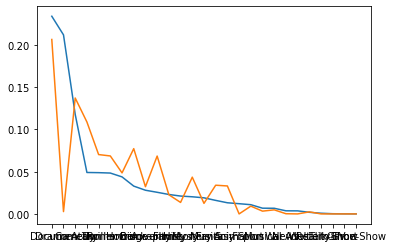

In [71]:
plt.plot(merged_inner_renamed.Genre, merged_inner_renamed["Prop movies (2000-19)"])
plt.plot(merged_inner_renamed.Genre, merged_inner_renamed["Prop dataset"])
plt.show()

In [ ]:
# import numpy as np
# from scipy.stats import chi2

# # Set the observed and expected frequencies
# observed = [82766,
# #  74965,
#  41678,
#  17348,
#  17275,
#  17110,
#  15502,
#  11645,
#  9915,
#  9056,
#  8141,
#  7476,
#  7173,
#  6741,
#  5665,
# #  4667,
# #  4278,
# #  3864,
# #  2397,
# #  2366,
# #  1300,
# #  1277,
# #  681,
# #  284,
# #  82,
# #  34,
# #  10
#            ]
# expected = [1884,
# #  25,
#  1252,
#  993,
#  641,
#  626,
#  443,
#  705,
#  294,
#  625,
#  207,
#  124,
#  397,
#  114,
#  310,
# #  302,
# #  0,
# #  84,
# #  30,
# #  44,
# #  2,
# #  0,
# #  22,
# #  0,
# #  0,
# #  0,
# #  0
# ]

# chi2_stat, p = chi2_contingency([observed, observed])[0:2]

# # Print the result
# print(f'Chi-squared statistic: {chi2_stat:.3f}')
# print(f'p-value: {p:.3f}')


In [6]:
movies_exp.to_csv("exploded_dataset.csv")

In [10]:
len(set(movies_exp.tconst))

3540

In [15]:
total_movies_rating.to_csv("movies_00_19_rating.csv")